In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
len(lats)

1500

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-75.15307686326454, 174.27098803587177),
 (-82.15373703870104, 108.69527209362587),
 (-55.448990022411216, 128.46594110883757),
 (-85.2981064225923, -108.52714952333567),
 (-52.56738406062971, 72.67009995308152),
 (66.57918012845681, 16.82160080176203),
 (-34.6558705182453, 143.61318894161712),
 (-55.065428738785606, 98.55049410822005),
 (23.2277317784324, 38.036221112980996),
 (-78.74890314626852, -116.78723289733156),
 (-44.513304306973446, 51.51773262389813),
 (65.28180379845608, 9.114275278290904),
 (8.132463176965132, 61.43689272138738),
 (21.49415900114819, -87.36292709720084),
 (19.324329689279693, -8.193979985936608),
 (-84.76540582215247, -104.27993563540745),
 (-71.59290462765676, 102.45398581719797),
 (43.86372022784994, 38.6438151160074),
 (71.55404283273057, -25.871494785263536),
 (-45.81296918345318, 177.93872189100807),
 (49.35125492279127, -94.7726280975405),
 (-58.52566329829435, -73.19587526700558),
 (78.69082497190135, -162.96329854127225),
 (-3.037877813606741, 4.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65349ca7dbb1f0d2bb1dcae524069dcc


In [8]:
# Create an empty list to hold the weather data 
city_data = []
#print the beginning of the logging
print("Begging Data Retrieval   ")
print("-------------------------")

# Create counters
record_count = 1 
set_count = 1

# Lopp through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count 
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Begging Data Retrieval   
-------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | straumen
Processing Record 7 of Set 1 | swan hill
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | umm lajj
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | sistranda
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | kantunilkin
Processing Record 14 of Set 1 | nara
Processing Record 15 of Set 1 | novomikhaylovskiy
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | waipawa
Processing Record 18 of Set 1 | kenora
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | richards bay
Processing 

Processing Record 35 of Set 4 | tromso
Processing Record 36 of Set 4 | trairi
Processing Record 37 of Set 4 | micheweni
Processing Record 38 of Set 4 | mandurah
Processing Record 39 of Set 4 | berlevag
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | merauke
Processing Record 43 of Set 4 | hualmay
Processing Record 44 of Set 4 | camabatela
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | barawe
City not found. Skipping...
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | riyadh
Processing Record 1 of Set 5 | jalu
Processing Record 2 of Set 5 | altay
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | hamilton
Processing Record

City not found. Skipping...
Processing Record 26 of Set 8 | miles city
Processing Record 27 of Set 8 | north bend
Processing Record 28 of Set 8 | puerto leguizamo
Processing Record 29 of Set 8 | puerto carreno
Processing Record 30 of Set 8 | ixtapa
Processing Record 31 of Set 8 | bafoulabe
Processing Record 32 of Set 8 | malartic
Processing Record 33 of Set 8 | pinawa
Processing Record 34 of Set 8 | sabha
Processing Record 35 of Set 8 | pedasi
Processing Record 36 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 8 | inverell
Processing Record 38 of Set 8 | sao gabriel da cachoeira
Processing Record 39 of Set 8 | canutama
Processing Record 40 of Set 8 | talawdi
City not found. Skipping...
Processing Record 41 of Set 8 | lavrentiya
Processing Record 42 of Set 8 | valparaiso
Processing Record 43 of Set 8 | abu zabad
Processing Record 44 of Set 8 | hokitika
Processing Record 45 of Set 8 | coruripe
Processing Record 46 of Set 8 | guerrero negro
Processing Recor

Processing Record 13 of Set 12 | sept-iles
Processing Record 14 of Set 12 | suwannaphum
Processing Record 15 of Set 12 | walvis bay
Processing Record 16 of Set 12 | quesnel
Processing Record 17 of Set 12 | springdale
Processing Record 18 of Set 12 | quincy
Processing Record 19 of Set 12 | robertson
Processing Record 20 of Set 12 | olafsvik
Processing Record 21 of Set 12 | kloulklubed
Processing Record 22 of Set 12 | stromness
Processing Record 23 of Set 12 | lewistown
Processing Record 24 of Set 12 | turukhansk
Processing Record 25 of Set 12 | dwarka
Processing Record 26 of Set 12 | sisimiut
Processing Record 27 of Set 12 | wanganui
Processing Record 28 of Set 12 | ryotsu
Processing Record 29 of Set 12 | kapuskasing
Processing Record 30 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 31 of Set 12 | voznesenskaya
Processing Record 32 of Set 12 | deputatskiy
Processing Record 33 of Set 12 | bunia
Processing Record 34 of Set 12 | gisors
Processing Record 35 of Se

In [9]:
num_cities = len(city_data)
print(num_cities)

553


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.08,90,19,2.53,NZ,2022-03-27 18:24:52
1,Albany,42.6001,-73.9662,38.39,58,100,3.00,US,2022-03-27 18:24:52
2,Mount Gambier,-37.8333,140.7667,60.71,94,75,5.75,AU,2022-03-27 18:24:53
3,Punta Arenas,-53.1500,-70.9167,50.11,57,0,27.63,CL,2022-03-27 18:23:11
4,Souillac,-20.5167,57.5167,79.18,83,40,0.00,MU,2022-03-27 18:21:18
5,Straumen,63.8709,11.2999,44.60,92,100,26.31,NO,2022-03-27 18:24:54
6,Swan Hill,-35.3378,143.5544,67.95,47,60,4.65,AU,2022-03-27 18:24:54
7,Busselton,-33.6500,115.3333,58.21,70,0,14.56,AU,2022-03-27 18:24:55
8,Umm Lajj,25.0213,37.2685,72.50,54,15,19.44,SA,2022-03-27 18:24:55
9,Sistranda,63.7256,8.8340,44.56,91,100,43.73,NO,2022-03-27 18:24:56


In [11]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,19,NZ,2022-03-27 18:24:52,90,-46.6000,168.3333,53.08,2.53
1,Albany,100,US,2022-03-27 18:24:52,58,42.6001,-73.9662,38.39,3.00
2,Mount Gambier,75,AU,2022-03-27 18:24:53,94,-37.8333,140.7667,60.71,5.75
3,Punta Arenas,0,CL,2022-03-27 18:23:11,57,-53.1500,-70.9167,50.11,27.63
4,Souillac,40,MU,2022-03-27 18:21:18,83,-20.5167,57.5167,79.18,0.00
...,...,...,...,...,...,...,...,...,...
548,Tamandare,100,BR,2022-03-27 18:40:15,80,-8.7597,-35.1047,81.28,8.46
549,Diffa,91,NE,2022-03-27 18:40:15,11,13.3154,12.6113,78.44,9.82
550,Makakilo City,20,US,2022-03-27 18:41:16,74,21.3469,-158.0858,73.72,6.91
551,Towada,92,JP,2022-03-27 18:41:18,91,40.6127,141.2067,38.21,6.60


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevent fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

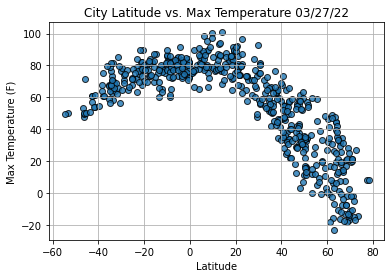

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

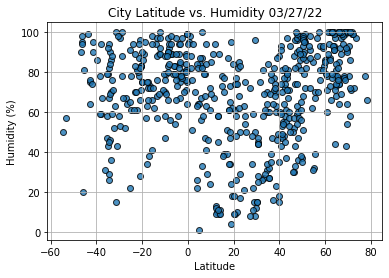

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

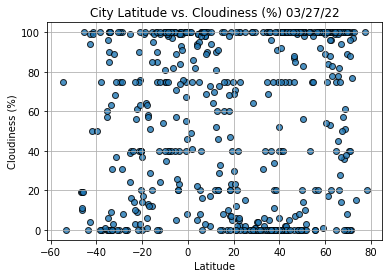

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

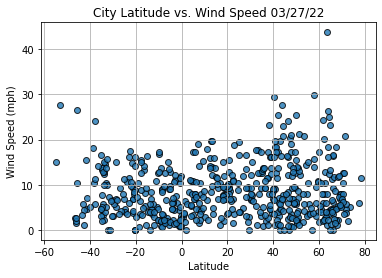

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City            Novomikhaylovskiy
Cloudiness                    100
Country                        RU
Date          2022-03-27 18:24:58
Humidity                       71
Lat                       44.2581
Lng                       38.8578
Max Temp                    42.51
Wind Speed                   7.81
Name: 13, dtype: object

In [21]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

In [22]:
northern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Albany,100,US,2022-03-27 18:24:52,58,42.6001,-73.9662,38.39,3.00
5,Straumen,100,NO,2022-03-27 18:24:54,92,63.8709,11.2999,44.60,26.31
8,Umm Lajj,15,SA,2022-03-27 18:24:55,54,25.0213,37.2685,72.50,19.44
9,Sistranda,100,NO,2022-03-27 18:24:56,91,63.7256,8.8340,44.56,43.73
10,Bandarbeyla,2,SO,2022-03-27 18:24:56,72,9.4942,50.8122,78.93,15.21
...,...,...,...,...,...,...,...,...,...
547,Nuuk,100,GL,2022-03-27 18:40:14,44,64.1835,-51.7216,38.01,2.30
549,Diffa,91,NE,2022-03-27 18:40:15,11,13.3154,12.6113,78.44,9.82
550,Makakilo City,20,US,2022-03-27 18:41:16,74,21.3469,-158.0858,73.72,6.91
551,Towada,92,JP,2022-03-27 18:41:18,91,40.6127,141.2067,38.21,6.60


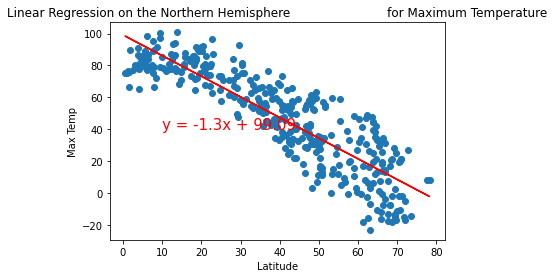

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

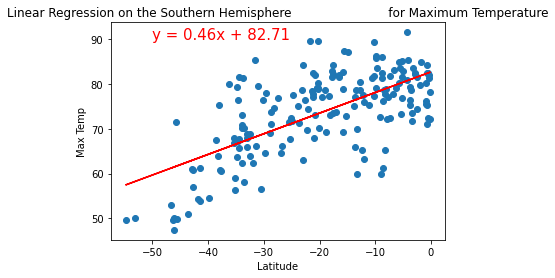

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

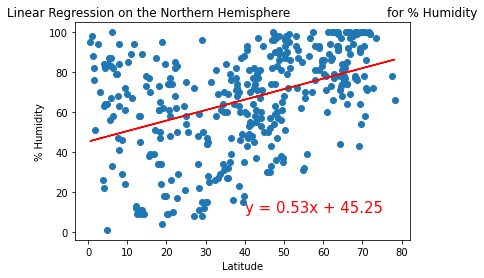

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

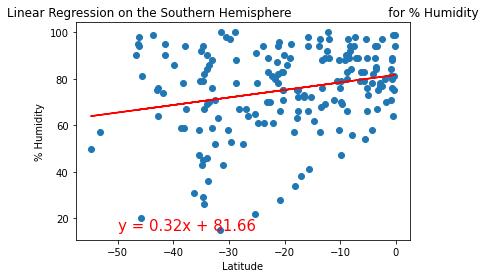

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

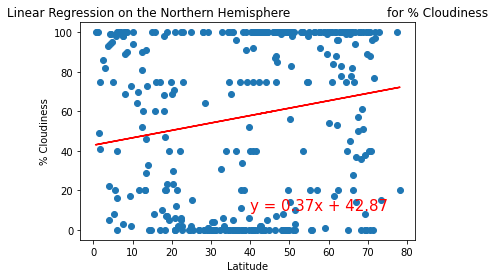

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

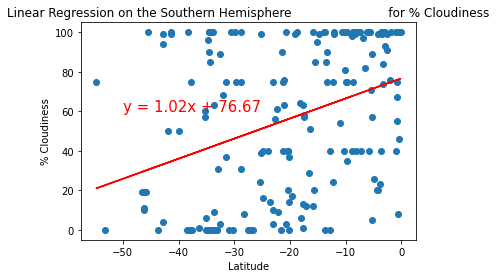

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

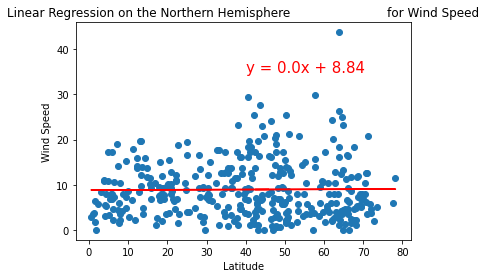

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

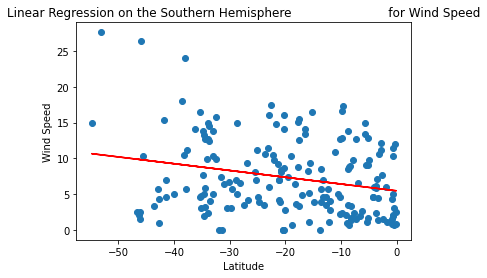

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))